In [1]:
import xarray as xr
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm

In [2]:
DATA_DIR = '/local/S.Rasp/ML-Workshop-Data/dataset2/'

In [3]:
!ls $DATA_DIR

forecast_errors.png  nwp_ecmwf-ifs.nc	power_curve_single_turbine.png
metobs.nc	     nwp_envca-gdps.nc	README.md
ml_workshop_data.7z  nwp_ncep-gfs4.nc	windpark.nc


## Check out the data

### NWP data

In [4]:
nwp_ec = xr.open_dataset(DATA_DIR + 'nwp_ecmwf-ifs.nc')
nwp_en = xr.open_dataset(DATA_DIR + 'nwp_envca-gdps.nc')
nwp_nc = xr.open_dataset(DATA_DIR + 'nwp_ncep-gfs4.nc')

In [5]:
nwps = [nwp_ec, nwp_en, nwp_nc]
nwps

[<xarray.Dataset>
 Dimensions:   (epoch_s: 1463, offset_s: 49)
 Coordinates:
   * epoch_s   (epoch_s) int32 1420070400 1420113600 1420156800 1420200000 ...
   * offset_s  (offset_s) int32 0 10800 21600 32400 43200 54000 64800 75600 ...
 Data variables:
     ws100m    (epoch_s, offset_s) float32 ...
     wd100m    (epoch_s, offset_s) float32 ...
     ws10m     (epoch_s, offset_s) float32 ...
     wd10m     (epoch_s, offset_s) float32 ...
     t2m       (epoch_s, offset_s) float32 ...
     blh       (epoch_s, offset_s) float32 ..., <xarray.Dataset>
 Dimensions:   (epoch_s: 1463, offset_s: 49)
 Coordinates:
   * epoch_s   (epoch_s) int32 1420070400 1420113600 1420156800 1420200000 ...
   * offset_s  (offset_s) int32 0 10800 21600 32400 43200 54000 64800 75600 ...
 Data variables:
     ws1000mb  (epoch_s, offset_s) float32 ...
     wd1000mb  (epoch_s, offset_s) float32 ...
     ws925mb   (epoch_s, offset_s) float32 ...
     wd925mb   (epoch_s, offset_s) float32 ...
     tclcov    (epoch_s,

In [69]:
np.isnan(nwp_nc.ws10m.values).shape

(2925, 49)

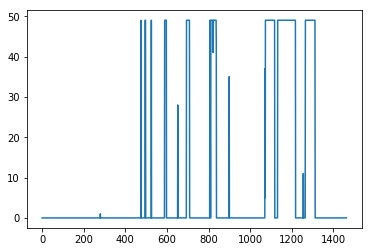

In [72]:
plt.plot(np.isnan(nwp_en.ws1000mb.values).sum(1))

In [6]:
# Convert POSIX to datetime
for nwp in nwps:
    nwp['epoch_s'] = pd.to_datetime(nwp.epoch_s, unit='s')

In [7]:
nwps

[<xarray.Dataset>
 Dimensions:   (epoch_s: 1463, offset_s: 49)
 Coordinates:
   * epoch_s   (epoch_s) datetime64[ns] 2015-01-01 2015-01-01T12:00:00 ...
   * offset_s  (offset_s) int32 0 10800 21600 32400 43200 54000 64800 75600 ...
 Data variables:
     ws100m    (epoch_s, offset_s) float32 ...
     wd100m    (epoch_s, offset_s) float32 ...
     ws10m     (epoch_s, offset_s) float32 ...
     wd10m     (epoch_s, offset_s) float32 ...
     t2m       (epoch_s, offset_s) float32 ...
     blh       (epoch_s, offset_s) float32 ..., <xarray.Dataset>
 Dimensions:   (epoch_s: 1463, offset_s: 49)
 Coordinates:
   * epoch_s   (epoch_s) datetime64[ns] 2015-01-01 2015-01-01T12:00:00 ...
   * offset_s  (offset_s) int32 0 10800 21600 32400 43200 54000 64800 75600 ...
 Data variables:
     ws1000mb  (epoch_s, offset_s) float32 ...
     wd1000mb  (epoch_s, offset_s) float32 ...
     ws925mb   (epoch_s, offset_s) float32 ...
     wd925mb   (epoch_s, offset_s) float32 ...
     tclcov    (epoch_s, offset_

In [8]:
for nwp in nwps:
    print(nwp.epoch_s.min(), nwp.epoch_s.max())

<xarray.DataArray 'epoch_s' ()>
array('2015-01-01T00:00:00.000000000', dtype='datetime64[ns]') <xarray.DataArray 'epoch_s' ()>
array('2017-01-01T00:00:00.000000000', dtype='datetime64[ns]')
<xarray.DataArray 'epoch_s' ()>
array('2015-01-01T00:00:00.000000000', dtype='datetime64[ns]') <xarray.DataArray 'epoch_s' ()>
array('2017-01-01T00:00:00.000000000', dtype='datetime64[ns]')
<xarray.DataArray 'epoch_s' ()>
array('2015-01-01T00:00:00.000000000', dtype='datetime64[ns]') <xarray.DataArray 'epoch_s' ()>
array('2017-01-01T00:00:00.000000000', dtype='datetime64[ns]')


In [9]:
nwp_ec.offset_s.max() / 60 / 60, (nwp_ec.offset_s[1] - nwp_ec.offset_s[0]) / 60

(<xarray.DataArray 'offset_s' ()>
 array(144.), <xarray.DataArray 'offset_s' ()>
 array(180.))

In [10]:
4*24

96

## Mast data

In [11]:
met = xr.open_dataset(DATA_DIR + 'metobs.nc'); met

<xarray.Dataset>
Dimensions:  (epoch_s: 63072)
Coordinates:
  * epoch_s  (epoch_s) int32 1420070400 1420071300 1420072200 1420073100 ...
Data variables:
    ws_avg   (epoch_s) float32 ...
    wd_avg   (epoch_s) float32 ...
    ws80m    (epoch_s) float32 ...
    ws34m    (epoch_s) float32 ...

In [12]:
# Convert to date time
met['epoch_s'] = pd.to_datetime(met.epoch_s, unit='s')

In [13]:
met.epoch_s.min(), met.epoch_s.max(), met.epoch_s[1] - met.epoch_s[0]

(<xarray.DataArray 'epoch_s' ()>
 array('2015-01-01T00:00:00.000000000', dtype='datetime64[ns]'),
 <xarray.DataArray 'epoch_s' ()>
 array('2016-10-18T23:45:00.000000000', dtype='datetime64[ns]'),
 <xarray.DataArray 'epoch_s' ()>
 array(900000000000, dtype='timedelta64[ns]'))

In [14]:
900000000000 / 1e9 / 60

15.0

## Target wind production data

In [15]:
pwr = xr.open_dataset(DATA_DIR + 'windpark.nc'); pwr

<xarray.Dataset>
Dimensions:   (epoch_s: 94608)
Coordinates:
  * epoch_s   (epoch_s) int32 1420070400 1420071000 1420071600 1420072200 ...
Data variables:
    power     (epoch_s) float32 ...
    rawpower  (epoch_s) float32 ...

In [16]:
# Convert to date time
pwr['epoch_s'] = pd.to_datetime(pwr.epoch_s, unit='s')

In [17]:
pwr.epoch_s.min(), pwr.epoch_s.max(), pwr.epoch_s[1] - pwr.epoch_s[0]

(<xarray.DataArray 'epoch_s' ()>
 array('2015-01-01T00:00:00.000000000', dtype='datetime64[ns]'),
 <xarray.DataArray 'epoch_s' ()>
 array('2016-10-18T23:50:00.000000000', dtype='datetime64[ns]'),
 <xarray.DataArray 'epoch_s' ()>
 array(600000000000, dtype='timedelta64[ns]'))

In [18]:
600000000000 / 1e9 / 60

10.0

## EDA

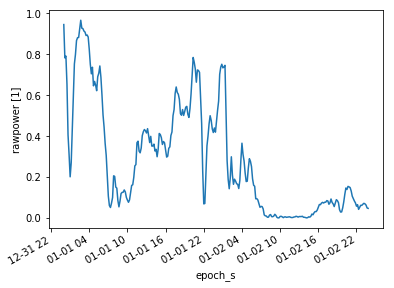

In [19]:
pwr.rawpower.sel(epoch_s=slice('2015-01-01', '2015-01-02')).plot()

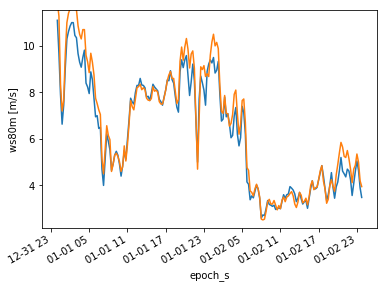

In [20]:
met.ws34m.sel(epoch_s=slice('2015-01-01', '2015-01-02')).plot()
met.ws80m.sel(epoch_s=slice('2015-01-01', '2015-01-02')).plot()

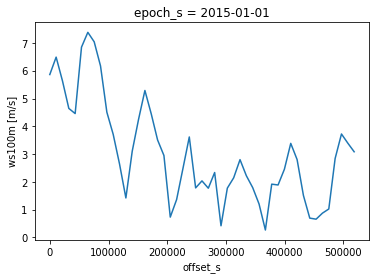

In [21]:
nwp_ec.ws100m.sel(epoch_s='2015-01-01T00').plot()

### Wind farm power curve

In [22]:
intersect = np.intersect1d(met.epoch_s, pwr.epoch_s)

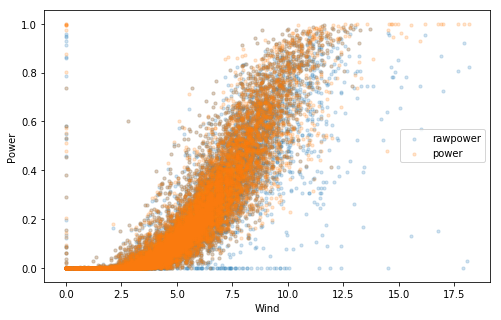

In [23]:
fig = plt.figure(figsize=(8, 5))
plt.scatter(met.ws34m.sel(epoch_s=intersect[::2]), pwr.rawpower.sel(epoch_s=intersect[::2]), s=10, alpha=0.2, 
           label='rawpower')
plt.scatter(met.ws34m.sel(epoch_s=intersect[::2]), pwr.power.sel(epoch_s=intersect[::2]), s=10, alpha=0.2,
           label='power')
plt.xlabel('Wind'); plt.ylabel('Power'); plt.legend()

## Split into datasets and prepare

total roughly 22 months

In [24]:
t_back = np.timedelta64(12, 'h')
train_range = slice('2015-01-01T12', '2015-12-31')
valid_range = slice('2016-01-01', '2016-04-30')
test_range = slice('2016-05-01', '2016-10-18T23:50')

In [25]:
def split(ds):
    return ds.sel(epoch_s=train_range), ds.sel(epoch_s=valid_range), ds.sel(epoch_s=test_range)

### Option 1: Latest available NWP

In [26]:
nwp_ec

<xarray.Dataset>
Dimensions:   (epoch_s: 1463, offset_s: 49)
Coordinates:
  * epoch_s   (epoch_s) datetime64[ns] 2015-01-01 2015-01-01T12:00:00 ...
  * offset_s  (offset_s) int32 0 10800 21600 32400 43200 54000 64800 75600 ...
Data variables:
    ws100m    (epoch_s, offset_s) float32 ...
    wd100m    (epoch_s, offset_s) float32 ...
    ws10m     (epoch_s, offset_s) float32 ...
    wd10m     (epoch_s, offset_s) float32 ...
    t2m       (epoch_s, offset_s) float32 ...
    blh       (epoch_s, offset_s) float32 ...

In [27]:
fc_lead = np.timedelta64(4*24*60*60+1, 's')

In [28]:
every_3_hours = np.arange('2015-01-01', np.datetime64('2016-10-18T23:50')-fc_lead, 
                          np.timedelta64(3, 'h'), dtype='datetime64[ns]')

In [29]:
train_range.start

'2015-01-01T12'

In [30]:
t = every_3_hours[1]; t

numpy.datetime64('2015-01-01T03:00:00.000000000')

In [31]:
e = nwp_ec.sel(epoch_s=t, method='ffill'); e

<xarray.Dataset>
Dimensions:   (offset_s: 49)
Coordinates:
    epoch_s   datetime64[ns] 2015-01-01
  * offset_s  (offset_s) int32 0 10800 21600 32400 43200 54000 64800 75600 ...
Data variables:
    ws100m    (offset_s) float32 ...
    wd100m    (offset_s) float32 ...
    ws10m     (offset_s) float32 ...
    wd10m     (offset_s) float32 ...
    t2m       (offset_s) float32 ...
    blh       (offset_s) float32 ...

In [32]:
offset = int(t - e.epoch_s) / 1e9; offset

10800.0

In [33]:
fc_lead = 4*24*60*60

In [34]:
e = e.sel(offset_s=slice(offset, offset+fc_lead))

In [35]:
for v in e.data_vars:
    print(e[v].values)

[6.4898725 5.634605  4.6443353 4.4582396 6.848489  7.382034  7.041829
 6.1719995 4.508078  3.7102172 2.6415453 1.4213299 3.103512  4.2527385
 5.2897115 4.4467044 3.5077186 2.9493427 0.732437  1.3627146 2.4827392
 3.61633   1.7838506 2.0357404 1.7722827 2.3367822 0.4201571 1.7750397
 2.1468422 2.8002076 2.2207377 1.7930771 1.2054965]
[355.0636    352.50848   342.34384     4.974042   20.016277   19.414217
  11.665945    3.4725168 346.6009    352.69174   340.15317    21.288338
  68.77709    52.387917   22.23334   357.7804    348.8169    347.56473
 328.63144   116.98958    85.32323    57.820568   50.745415   13.221746
 338.71487   338.63483   184.17598   124.33079    95.5627     84.56578
  61.264797  349.97922   345.96017  ]
[4.9153886 3.9240022 3.158168  3.8089957 5.693307  6.216066  5.7073874
 4.6632237 3.0033753 2.3157218 1.7537808 1.3022597 3.0725126 3.901163
 4.4058676 3.414275  2.1812153 1.9324714 0.5561029 1.415275  2.477819
 3.4498005 1.9555744 1.8426445 1.199936  1.336043  0.49773

In [73]:
def get_latest_fc(t, nwps, flatten=True):
    a = []
    for nwp in nwps[:1]:
        e = nwp.sel(epoch_s=t, method='ffill')
        offset = int(t - e.epoch_s) / 1e9
        fc_lead = 4*24*60*60
        e = e.sel(offset_s=slice(offset, offset+fc_lead))
        for v in e.data_vars:
            a.append(e[v].values)
    a = np.array(a)
    return a.reshape(-1) if flatten else a

In [74]:
t

numpy.datetime64('2016-03-03T09:00:00.000000000')

In [75]:
fc_lead = np.timedelta64(4*24*60*60+1, 's')
time_idxs = np.arange(t, t+fc_lead, np.timedelta64(3, 'h'), dtype='datetime64[ns]')

In [76]:
pwr.rawpower.sel(epoch_s=time_idxs)

<xarray.DataArray 'rawpower' (epoch_s: 33)>
array([0.000000e+00, 0.000000e+00, 0.000000e+00, 2.901348e-01, 1.772087e-01,
       4.854783e-02, 5.809131e-02, 1.110870e-03, 1.282609e-04, 0.000000e+00,
       2.306522e-03, 1.086957e-04, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 2.902174e-03, 8.469565e-03, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       2.173913e-06, 9.654565e-02, 1.844870e-01, 2.897739e-01, 1.187196e-01,
       7.119782e-02, 9.059348e-02, 1.925500e-01], dtype=float32)
Coordinates:
  * epoch_s  (epoch_s) datetime64[ns] 2016-03-03T09:00:00 ...
Attributes:
    descr:    raw normalized wind park power output
    units:    1

In [77]:
def get_y(t, da=pwr.rawpower, dt=np.timedelta64(1, 'h')):
    fc_lead = np.timedelta64(4*24*60*60, 's')
    time_idxs = np.arange(t, t+fc_lead, dt, dtype='datetime64[ns]')
    return da.sel(epoch_s=time_idxs).values

In [78]:
t

numpy.datetime64('2016-03-03T09:00:00.000000000')

In [79]:
da_resampled = pwr.rawpower.resample(epoch_s='3h').mean()

In [80]:
da_resampled.epoch_s

<xarray.DataArray 'epoch_s' (epoch_s: 5256)>
array(['2015-01-01T00:00:00.000000000', '2015-01-01T03:00:00.000000000',
       '2015-01-01T06:00:00.000000000', ..., '2016-10-18T15:00:00.000000000',
       '2016-10-18T18:00:00.000000000', '2016-10-18T21:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * epoch_s  (epoch_s) datetime64[ns] 2015-01-01 2015-01-01T03:00:00 ...

In [81]:
pwr.rawpower[:6].mean()

<xarray.DataArray 'rawpower' ()>
array(0.648451)

In [82]:
every_3_hours[(every_3_hours >= np.datetime64(train_range.start)) & (every_3_hours <= np.datetime64(train_range.stop))]

array(['2015-01-01T12:00:00.000000000', '2015-01-01T15:00:00.000000000',
       '2015-01-01T18:00:00.000000000', ...,
       '2015-12-30T18:00:00.000000000', '2015-12-30T21:00:00.000000000',
       '2015-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [103]:
X_train = []
y_train = []
every_3_hours_train = every_3_hours[(every_3_hours >= np.datetime64(train_range.start)) & 
                                    (every_3_hours <= np.datetime64(train_range.stop))]
for t in tqdm(every_3_hours_train):
    X_train.append(get_latest_fc(t, nwps))
    y_train.append(get_y(t, da_resampled, dt=np.timedelta64(3, 'h')))

In [104]:
X_valid = []
y_valid = []
every_3_hours_valid = every_3_hours[(every_3_hours >= np.datetime64(valid_range.start)) & 
                                    (every_3_hours <= np.datetime64(valid_range.stop))]
for t in tqdm(every_3_hours_valid):
    X_valid.append(get_latest_fc(t, nwps))
    y_valid.append(get_y(t, da_resampled, dt=np.timedelta64(3, 'h')))

In [105]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_valid, y_valid = np.array(X_valid), np.array(y_valid)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((2909, 198), (2909, 32), (961, 198), (961, 32))

In [132]:
y_valid

array([[2.00392902e-01, 2.66755551e-01, 8.47945660e-02, ...,
        1.56448796e-01, 9.52983052e-02, 1.76999763e-01],
       [2.66755551e-01, 8.47945660e-02, 1.53106283e-02, ...,
        9.52983052e-02, 1.76999763e-01, 1.51599035e-01],
       [8.47945660e-02, 1.53106283e-02, 5.66405803e-02, ...,
        1.76999763e-01, 1.51599035e-01, 4.40644957e-02],
       ...,
       [5.42857885e-01, 5.15240908e-01, 1.37278259e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.15240908e-01, 1.37278259e-01, 1.15899988e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.37278259e-01, 1.15899988e-01, 1.62498891e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.93840577e-04]])

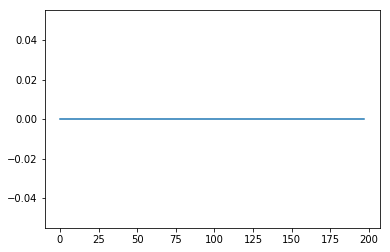

In [107]:
plt.plot(np.isnan(X_train).sum(0))

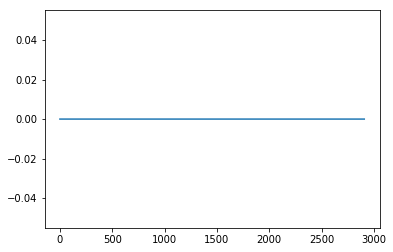

In [108]:
plt.plot(np.isnan(X_train).sum(1))

In [109]:
X_train[np.isnan(X_train)] = np.nanmean(X_train)
X_valid[np.isnan(X_valid)] = np.nanmean(X_valid)

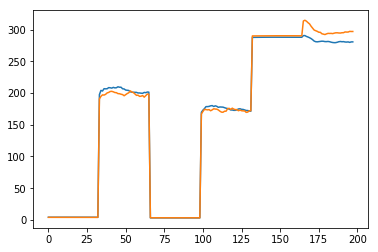

In [110]:
plt.plot(X_train.mean(0))
plt.plot(X_valid.mean(0))

## Linear regression

In [111]:
#normalize
mean, std = X_train.mean(0), X_train.std(0)
X_train = (X_train - mean) / std
X_valid = (X_valid - mean) / std

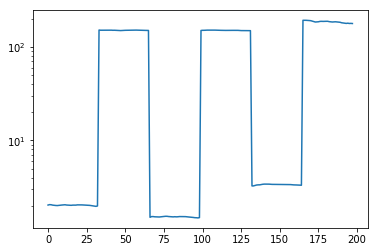

In [112]:
plt.plot(std); plt.yscale('log')

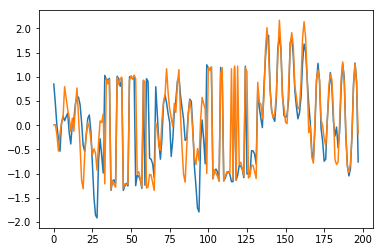

In [113]:
plt.plot(X_train[-1])
plt.plot(X_valid[0])

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
lr.score(X_train, y_train)

0.6203319020812886

In [117]:
lr.score(X_valid, y_valid)

0.3018161292318203

In [118]:
def mse(y_true, y_pred, axis=(0,1)): return ((y_true - y_pred)**2).mean(axis)

In [119]:
mse(y_valid, lr.predict(X_valid))

0.026419838138185565

In [120]:
mse(y_valid, np.ones(y_valid.shape) * y_train.mean())

0.041433142782201754

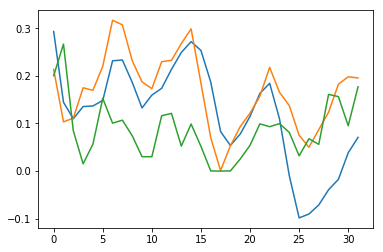

In [121]:
plt.plot(lr.predict(X_train[-1][None])[0])
plt.plot(lr.predict(X_valid[0][None])[0])
plt.plot(y_valid[0])

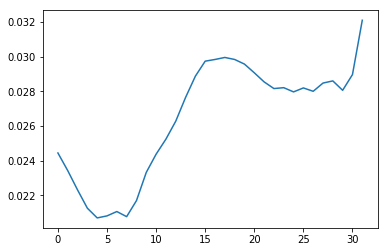

In [122]:
plt.plot(mse(y_valid, lr.predict(X_valid), 0))

## Random forest

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
rf = RandomForestRegressor(n_estimators=40, n_jobs=-1, min_samples_leaf=10)

In [125]:
%time rf.fit(X_train, y_train)

CPU times: user 30.2 s, sys: 12 ms, total: 30.2 s
Wall time: 1.95 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [126]:
rf.score(X_train, y_train), rf.score(X_valid, y_valid)

(0.6475369944556273, 0.47080997585594087)

In [127]:
preds = rf.predict(X_valid)

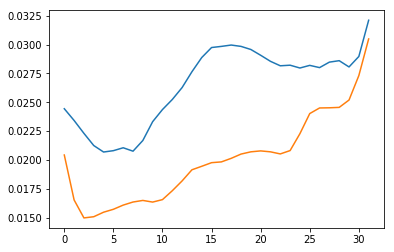

In [128]:
plt.plot(mse(y_valid, lr.predict(X_valid), 0))
plt.plot(mse(y_valid, rf.predict(X_valid), 0))

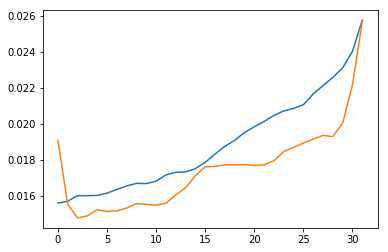

In [129]:
plt.plot(mse(y_train, lr.predict(X_train), 0))
plt.plot(mse(y_train, rf.predict(X_train), 0))

In [130]:
plt.plot(np.mean(y_train_10m, 0))
plt.plot(np.mean(y_valid_10m, 0))

NameError: name 'y_train_10m' is not defined

In [ ]:
i = 100
plt.plot(preds[i])
plt.plot(y_valid[i])

In [ ]:
plt.scatter(y_valid, rf.predict(X_valid), s=5, alpha=0.2)

## Add previous observation data

In [116]:
t

numpy.datetime64('2016-04-30T00:00:00.000000000')

In [117]:
t_history = np.timedelta64(6, 'h')

In [118]:
time_idxs = np.arange(t-t_history, t, np.timedelta64(30, 'm'), dtype='datetime64[ns]')

In [119]:
time_idxs

array(['2016-04-29T18:00:00.000000000', '2016-04-29T18:30:00.000000000',
       '2016-04-29T19:00:00.000000000', '2016-04-29T19:30:00.000000000',
       '2016-04-29T20:00:00.000000000', '2016-04-29T20:30:00.000000000',
       '2016-04-29T21:00:00.000000000', '2016-04-29T21:30:00.000000000',
       '2016-04-29T22:00:00.000000000', '2016-04-29T22:30:00.000000000',
       '2016-04-29T23:00:00.000000000', '2016-04-29T23:30:00.000000000'],
      dtype='datetime64[ns]')

In [120]:
met.ws80m

<xarray.DataArray 'ws80m' (epoch_s: 63072)>
array([11.9     , 11.283334,  8.35    , ...,  7.666667,  7.75    ,  7.783333],
      dtype=float32)
Coordinates:
  * epoch_s  (epoch_s) datetime64[ns] 2015-01-01 2015-01-01T00:15:00 ...
Attributes:
    descr:    wind speed from met mast at 80 m above surface
    units:    m/s

In [121]:
def get_met_obs(t, t_back=np.timedelta64(6, 'h'), dt=np.timedelta64(30, 'm'), var='ws80m'):
    time_idxs = np.arange(t-t_back, t, dt, dtype='datetime64[ns]')
    return met[var].sel(epoch_s=time_idxs).values

In [155]:
X_obs = []
every_3_hours_train = every_3_hours[(every_3_hours >= np.datetime64(train_range.start)) & 
                                    (every_3_hours <= np.datetime64(train_range.stop))]
for t in tqdm(every_3_hours_train):
    X_obs.append(get_met_obs(t))

In [156]:
X_obs = np.array(X_obs); X_obs.shape

(2909, 12)

In [157]:
X_obs.size

34908

In [158]:
np.isnan(X_obs).sum()/X_obs.size

0.022974676291967457

In [159]:
X_obs[np.isnan(X_obs)] = np.nanmean(X_obs)

In [160]:
X_train2 = np.hstack([X_train, X_obs]); X_train2.shape, X_train.shape

((2909, 606), (2909, 594))

In [161]:
X_obs = []
every_3_hours_valid = every_3_hours[(every_3_hours >= np.datetime64(valid_range.start)) & 
                                    (every_3_hours <= np.datetime64(valid_range.stop))]
for t in tqdm(every_3_hours_valid):
    X_obs.append(get_met_obs(t))

In [162]:
X_obs = np.array(X_obs); X_obs.shape

(961, 12)

In [163]:
X_obs[np.isnan(X_obs)] = np.nanmean(X_obs)

In [164]:
X_valid2 = np.hstack([X_valid, X_obs]); X_valid2.shape, X_valid.shape

((961, 606), (961, 594))

### train models again

In [165]:
rf2 = RandomForestRegressor(n_estimators=40, n_jobs=-1, min_samples_leaf=10)

In [167]:
%time rf2.fit(X_train2, y_train)

CPU times: user 1min 33s, sys: 32 ms, total: 1min 33s
Wall time: 5.47 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [175]:
rf.score(X_train, y_train), rf.score(X_valid, y_valid)

(0.5943263907762668, 0.4345368228769204)

In [169]:
rf2.score(X_train2, y_train), rf2.score(X_valid2, y_valid)

(0.5954800844911506, 0.4425051260286215)

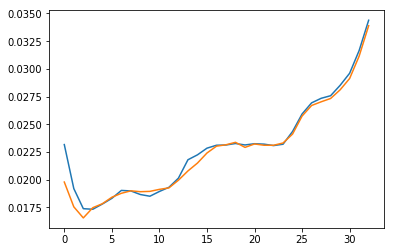

In [177]:
plt.plot(mse(y_valid, rf.predict(X_valid), 0))
plt.plot(mse(y_valid, rf2.predict(X_valid2), 0))

### Weight by fc lead time

In [185]:
y_train.shape

(2909, 33)

In [186]:
weight = np.linspace(2, 1, 33); weight

array([2.     , 1.96875, 1.9375 , 1.90625, 1.875  , 1.84375, 1.8125 ,
       1.78125, 1.75   , 1.71875, 1.6875 , 1.65625, 1.625  , 1.59375,
       1.5625 , 1.53125, 1.5    , 1.46875, 1.4375 , 1.40625, 1.375  ,
       1.34375, 1.3125 , 1.28125, 1.25   , 1.21875, 1.1875 , 1.15625,
       1.125  , 1.09375, 1.0625 , 1.03125, 1.     ])

In [187]:
rf3 = RandomForestRegressor(n_estimators=40, n_jobs=-1, min_samples_leaf=10)

In [188]:
%time rf3.fit(X_train2, y_train*weight)

CPU times: user 1min 34s, sys: 0 ns, total: 1min 34s
Wall time: 5.68 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [192]:
rf3.score(X_train2, y_train*weight), rf3.score(X_valid2, y_valid*weight)

(0.6161919580360135, 0.4823597277443385)

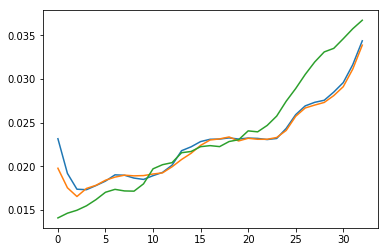

In [193]:
plt.plot(mse(y_valid, rf.predict(X_valid), 0))
plt.plot(mse(y_valid, rf2.predict(X_valid2), 0))
plt.plot(mse(y_valid, rf3.predict(X_valid2)/weight, 0))

### Separate models

In [194]:
rf_early = RandomForestRegressor(n_estimators=40, n_jobs=-1, min_samples_leaf=10)

In [195]:
y_train.shape

(2909, 33)

In [196]:
%time rf_early.fit(X_train2, y_train[:, :15])

CPU times: user 1min 9s, sys: 16 ms, total: 1min 9s
Wall time: 3.95 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [197]:
rf_late = RandomForestRegressor(n_estimators=40, n_jobs=-1, min_samples_leaf=10)

In [198]:
%time rf_late.fit(X_train2, y_train[:, 15:])

CPU times: user 1min 12s, sys: 0 ns, total: 1min 12s
Wall time: 4.25 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [199]:
preds_concat = np.hstack([rf_early.predict(X_valid2), rf_late.predict(X_valid2)]); preds_concat.shape

(961, 33)

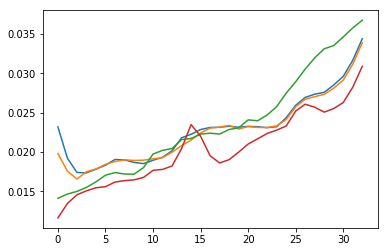

In [200]:
plt.plot(mse(y_valid, rf.predict(X_valid), 0))
plt.plot(mse(y_valid, rf2.predict(X_valid2), 0))
plt.plot(mse(y_valid, rf3.predict(X_valid2)/weight, 0))
plt.plot(mse(y_valid, preds_concat, 0))

### 10 minute interval forecasts

In [206]:
y_train_10m = []
every_3_hours_train = every_3_hours[(every_3_hours >= np.datetime64(train_range.start)) & 
                                    (every_3_hours <= np.datetime64(train_range.stop))]
for t in tqdm(every_3_hours_train):
    y_train_10m.append(get_y(t, dt=np.timedelta64(10, 'm')))

In [207]:
y_valid_10m = []
for t in tqdm(every_3_hours_valid):
    y_valid_10m.append(get_y(t, dt=np.timedelta64(10, 'm')))

In [208]:
y_train_10m = np.array(y_train_10m)
y_valid_10m = np.array(y_valid_10m)
y_train_10m.shape, y_valid_10m.shape, y_train.shape

((2909, 577), (961, 577), (2909, 33))

In [209]:
rf_10m = RandomForestRegressor(n_estimators=40, n_jobs=-1, min_samples_leaf=10)

In [210]:
%time rf_10m.fit(X_train2, y_train_10m)

CPU times: user 12min 13s, sys: 172 ms, total: 12min 13s
Wall time: 39.2 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [213]:
rf2.score(X_train2, y_train), rf2.score(X_valid2, y_valid)

(0.5954800844911506, 0.4425051260286215)

In [212]:
rf_10m.score(X_train2, y_train_10m), rf_10m.score(X_valid2, y_valid_10m)

(0.5945406041224824, 0.4396679652228934)

In [214]:
preds = rf_10m.predict(X_valid2)

In [215]:
preds.shape, y_valid_10m.shape

((961, 577), (961, 577))

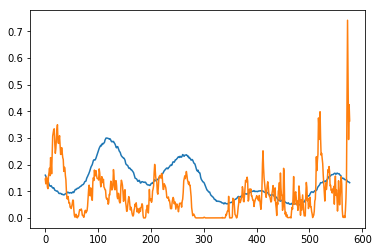

In [216]:
i = 0
plt.plot(preds[i])
plt.plot(y_valid_10m[i])

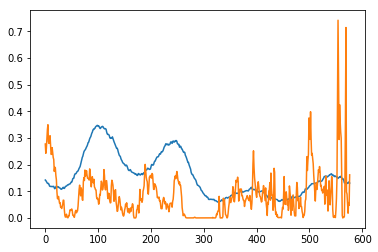

In [218]:
i = 1
plt.plot(preds[i])
plt.plot(y_valid_10m[i])